In [1]:
import world
import agents
from ff import Solved
import ff

In [2]:
w = world.PDDLWorld('blocks-domain.pddl', 'pddl/blocks_problem_colour1.pddl')
agent = agents.CorrectingAgent(w)

Parsing domain blocks-domain.pddl
Parsing problem pddl/blocks_problem_colour1.pddl


In [3]:
def test_success(world):
    domain, problem = world.to_pddl()
    try:
        ff.run(domain, problem)
    except Solved:
        return True
    return False

In [4]:
test_success(w)

False

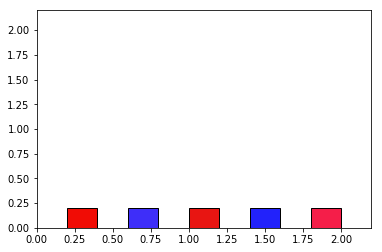

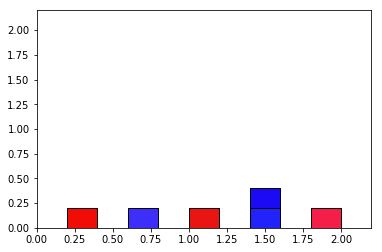

correction?


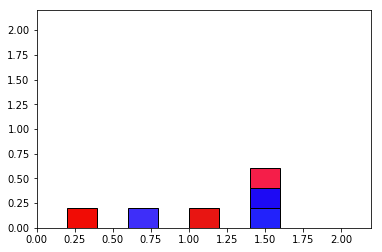

correction?


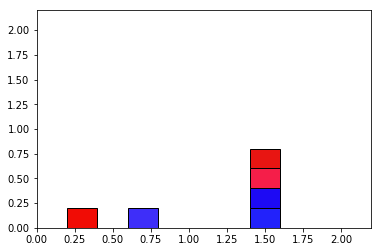

correction?


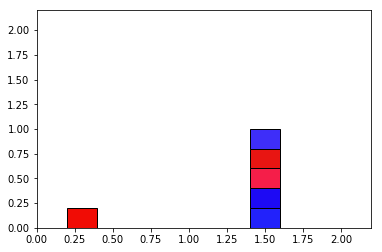

correction?


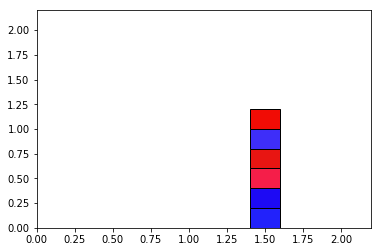

correction?
DONE


In [4]:
w.draw()
while not test_success(w):

    plan = agent.plan()
    for a, args in plan:
        w.update(a, args)
        w.draw()
        correction = input('correction?')
        if correction:
            agent.get_correction(correction, a, args)
            w.draw()
            break
        else:
            agent.no_correction(a, args)
            
print('DONE')    

In [6]:
correction_type2 = 'No, now you cannot put b3 in the tower because you must put red blocks on blue blocks'

In [7]:
o = w.sense()

In [8]:
o.state[0].asPDDL()

'(on-table b4)'

In [9]:
from pythonpddl2.pddl import Predicate, Formula, TypedArg, TypedArgList

In [10]:
p = Predicate('green', TypedArgList([TypedArg('b1')]))

In [11]:
Formula([p], op=None).asPDDL()

'(green b1)'

In [12]:
for a, b in {}:
    print(a, b)

In [13]:
agent._print_goal()

(forall (?x) (in-tower ?x))


In [14]:
agent.problem.goal.asPDDL()

'(forall (?x) (in-tower ?x))'

In [15]:
import goal_updates

In [16]:
goal_updates.create_default_goal().asPDDL()

'(forall (?x) (in-tower ?x))'

In [17]:
agent._print_goal()

(forall (?x) (in-tower ?x))


In [18]:
agent.sense()

Observation(objects=['b1', 'b2', 'b3', 'b4', 'b5', 'b6'], colours={'b1': array([0.95375877, 0.0447673 , 0.05506011]), 'b2': array([0.03894894, 0.00507169, 0.90456155]), 'b3': array([0.78447564, 0.19057989, 0.02304669]), 'b4': array([0.07487229, 0.04162719, 0.98847858]), 'b5': array([0.93083181, 0.00334435, 0.04017882]), 'b6': array([0.08489445, 0.07939505, 0.99470058])}, relations={'b1': {'clear': <pythonpddl2.pddl.Predicate object at 0x7f8dab747978>, 'on': <pythonpddl2.pddl.Predicate object at 0x7f8dab6e9438>, 'in-tower': <pythonpddl2.pddl.Predicate object at 0x7f8dab6e91d0>}, 'b2': {'on': <pythonpddl2.pddl.Predicate object at 0x7f8dab6e9438>, 'in-tower': <pythonpddl2.pddl.Predicate object at 0x7f8dab6e9780>}, 'b3': {'on': <pythonpddl2.pddl.Predicate object at 0x7f8dab6e9f28>, 'in-tower': <pythonpddl2.pddl.Predicate object at 0x7f8dab755160>}, 'b4': {'on-table': <pythonpddl2.pddl.Predicate object at 0x7f8dab704f60>, 'in-tower': <pythonpddl2.pddl.Predicate object at 0x7f8dab703e10>, 'o

In [19]:
for s in agent.problem.initialstate:
    print(s.asPDDL())

(on-table b4)
(clear b1)
(arm-empty )
(in-tower b4)
(on b6 b4)
(in-tower b6)
(on b5 b6)
(in-tower b5)
(on b3 b5)
(in-tower b3)
(on b2 b3)
(in-tower b2)
(on b1 b2)
(in-tower b1)


In [20]:
blue = agent.colour_models['blue']
blue.mu0

KeyError: 'blue'

In [ ]:
red = agent.colour_models['red']
red.mu0

In [23]:
print(w.problem.asPDDL())

(define (problem blocks-1)
	(:domain blocksworld)
	(:objects b1 b2 b3 b4 b5 b6)
	(:init 
		(on-table b4)
		(clear b1)
		(arm-empty )
		(red b1)
		(red b3)
		(in-tower b4)
		(blue b2)
		(blue b4)
		(red b5)
		(blue b6)
		(on b6 b4)
		(in-tower b6)
		(on b5 b6)
		(in-tower b5)
		(on b3 b5)
		(in-tower b3)
		(on b2 b3)
		(in-tower b2)
		(on b1 b2)
		(in-tower b1)
	)
	(:goal (forall (?x) (in-tower ?x)))
)
